In [8]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [9]:
df= sns.load_dataset('titanic')

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
print("shape of dataset: ", df.shape)

shape of dataset:  (891, 15)


In [12]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [13]:
print("Missing values in each column:", df.isnull().sum())

Missing values in each column: survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [14]:
print("Data types: ", df.dtypes)

Data types:  survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [15]:
print("Summary statistics:", df.describe(include='all'))

Summary statistics:           survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_tow

In [16]:
print("Percentage of missing values in each column: ", (df.isnull().sum()/len(df))*100)

Percentage of missing values in each column:  survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


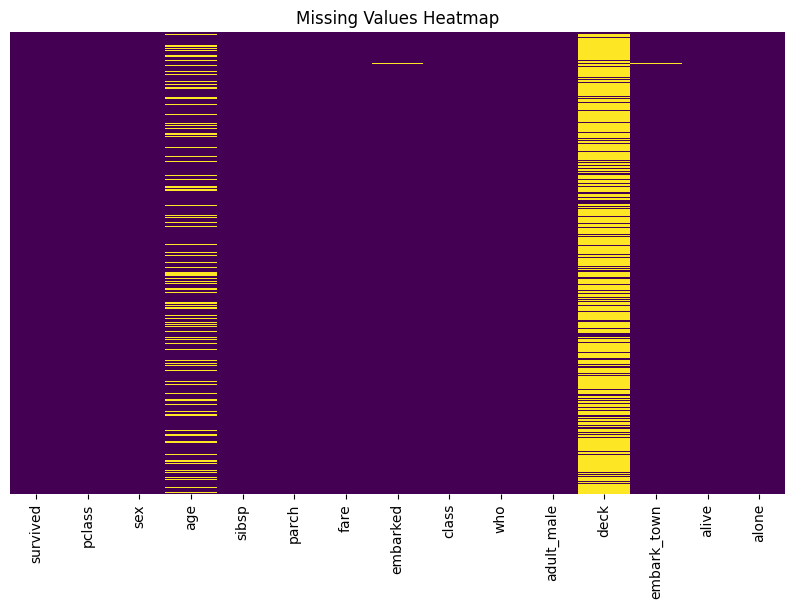

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df_filled = df.copy()

numerical_cols = df_filled.select_dtypes(include=['number']).columns
categorial_cols = df_filled.select_dtypes(exclude=['number']).columns

imputer_num = IterativeImputer(estimator = RandomForestRegressor(), random_state=0)

df_filled[numerical_cols] = imputer_num.fit_transform(df_filled[numerical_cols])

for col in categorial_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

print("\nMissing Values after imputation:\n", df_filled.isnull().sum())



Missing Values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\NEEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Survival Count :
 survived
0.0    549
1.0    342
Name: count, dtype: int64


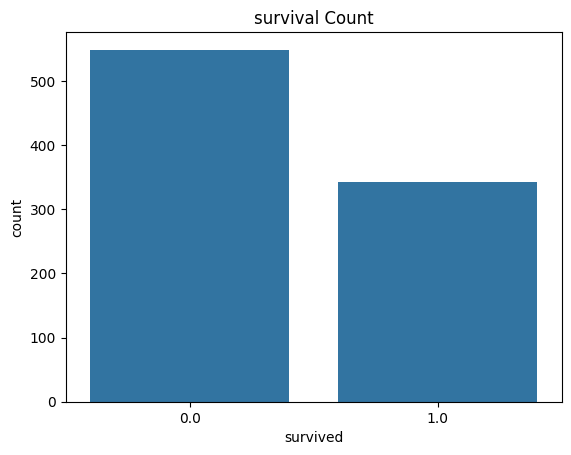


Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


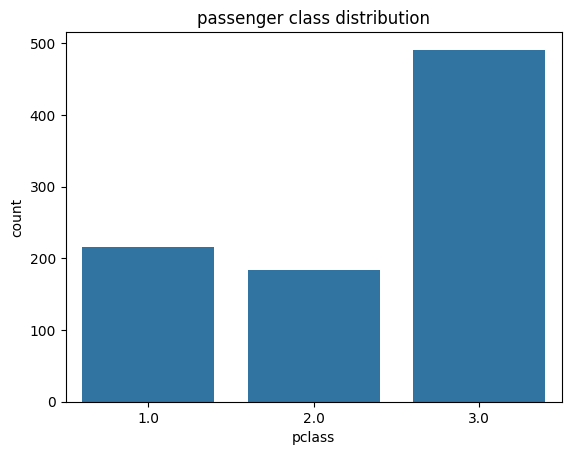


Age Statistics:
 count    891.000000
mean      29.668256
std       13.757830
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64


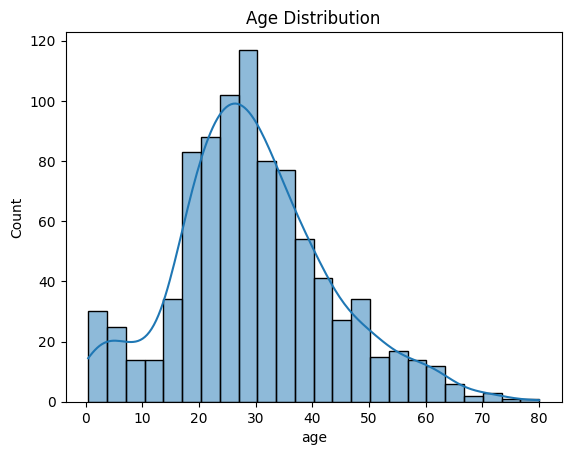


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


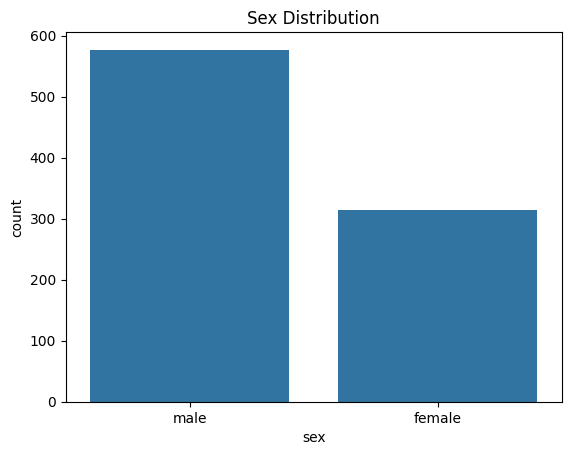

In [22]:
print("\nSurvival Count :\n", df_filled['survived'].value_counts())

sns.countplot(x='survived', data= df_filled)
plt.title('survival Count')
plt.show()


print("\nPclass Distribution:\n", df_filled['pclass'].value_counts())
sns.countplot(x='pclass', data=df_filled)
plt.title('passenger class distribution')
plt.show()

print("\nAge Statistics:\n", df_filled['age'].describe())
sns.histplot(x='age', data=df_filled, kde=True)
plt.title('Age Distribution')
plt.show()

print("\nSex Distribution:\n", df_filled['sex'].value_counts())
sns.countplot(x='sex', data=df_filled)
plt.title('Sex Distribution')
plt.show()


Survival by gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


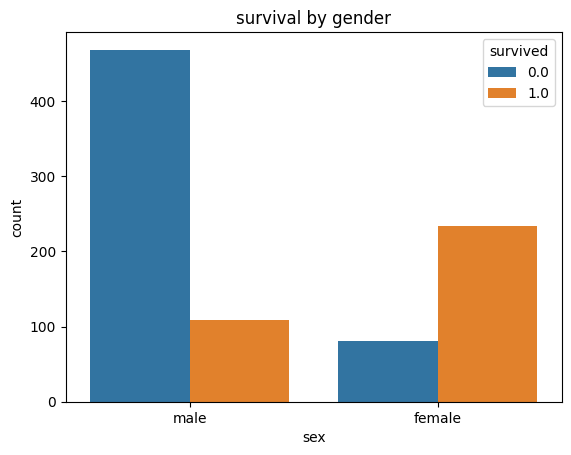


Survival by passenger class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


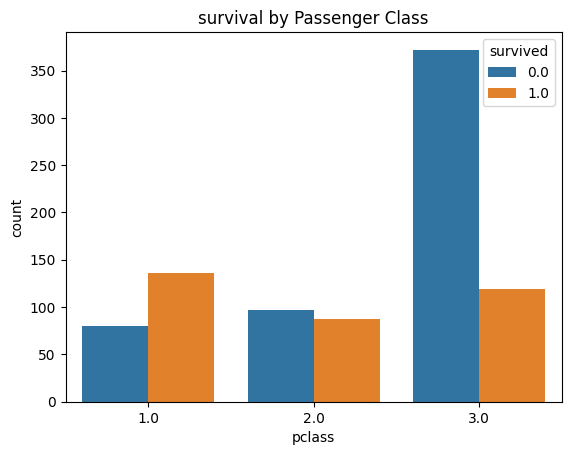

C:\Users\NEEL\AppData\Local\Temp\ipykernel_23604\1775277129.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurviveal by Age Group:\n", df_filled.groupby('age_group')['survived'].value_counts())



Surviveal by Age Group:
 age_group  survived
child      0.0          80
           1.0          78
Adult      0.0         462
           1.0         263
senior     0.0           7
           1.0           1
Name: count, dtype: int64


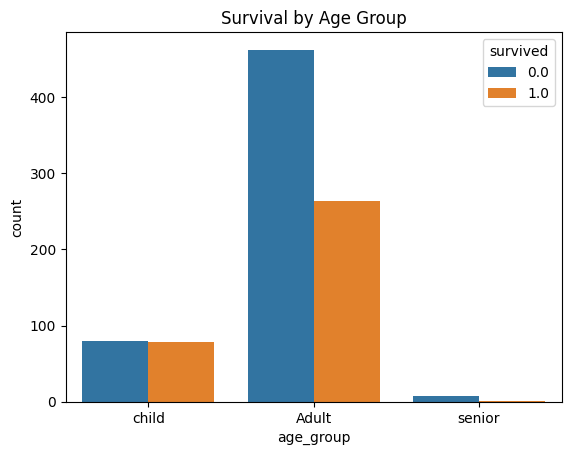


Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


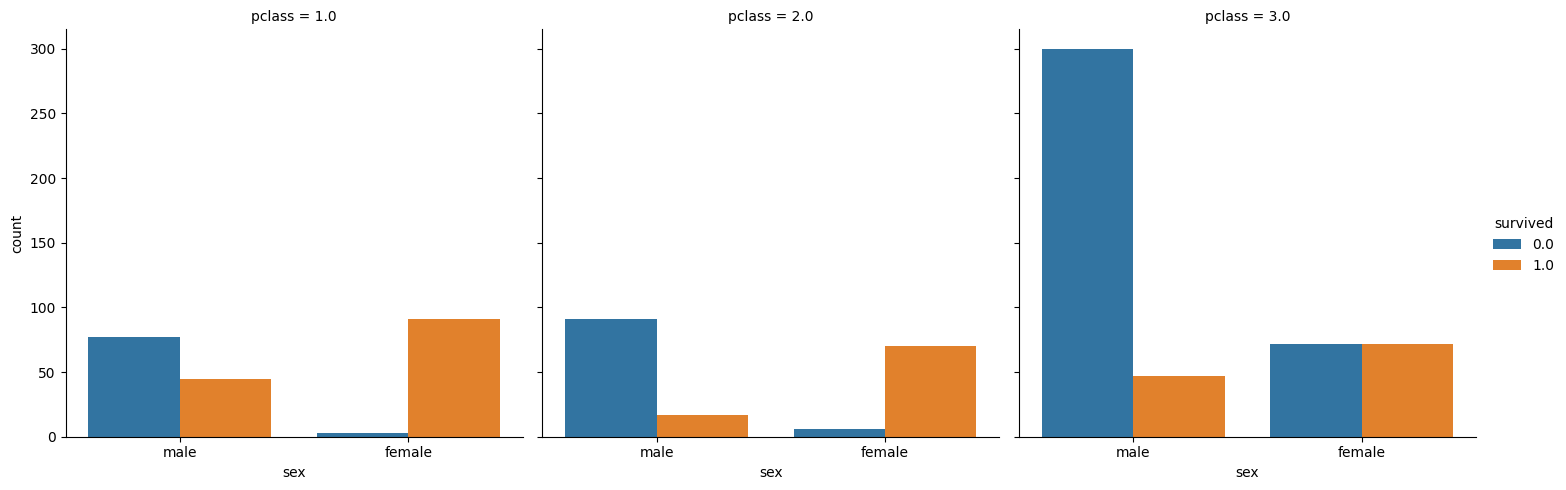

In [26]:
print("\nSurvival by gender:\n", df_filled.groupby('sex')['survived'].value_counts())
sns.countplot(x='sex', hue='survived', data=df_filled)
plt.title('survival by gender')
plt.show()

print("\nSurvival by passenger class:\n", df_filled.groupby('pclass')['survived'].value_counts())
sns.countplot(x='pclass', hue='survived', data=df_filled)
plt.title('survival by Passenger Class')
plt.show()

df_filled['age_group'] = pd.cut(df_filled['age'], bins=[0, 18, 65, 100], labels=['child', 'Adult', 'senior'])
print("\nSurviveal by Age Group:\n", df_filled.groupby('age_group')['survived'].value_counts())
sns.countplot(x='age_group', hue='survived', data=df_filled)
plt.title('Survival by Age Group')
plt.show()

print("\nSurvival by Gender and Class:\n", df_filled.groupby(['sex', 'pclass'])['survived'].value_counts())
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=df_filled)
plt.show()

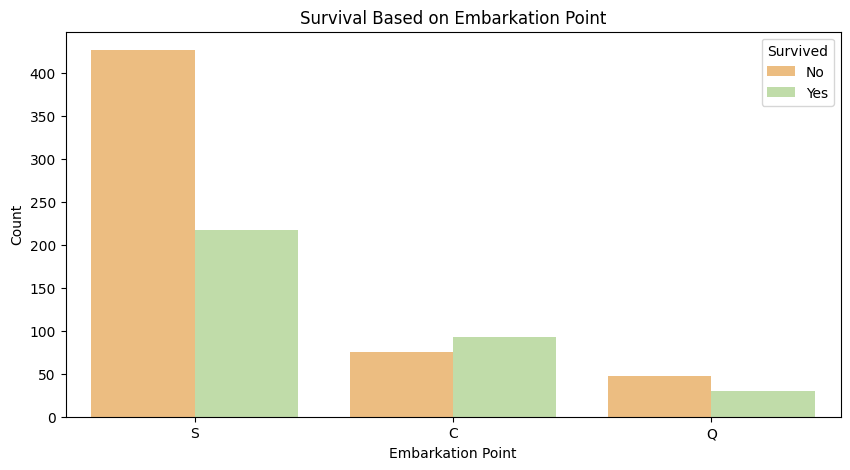

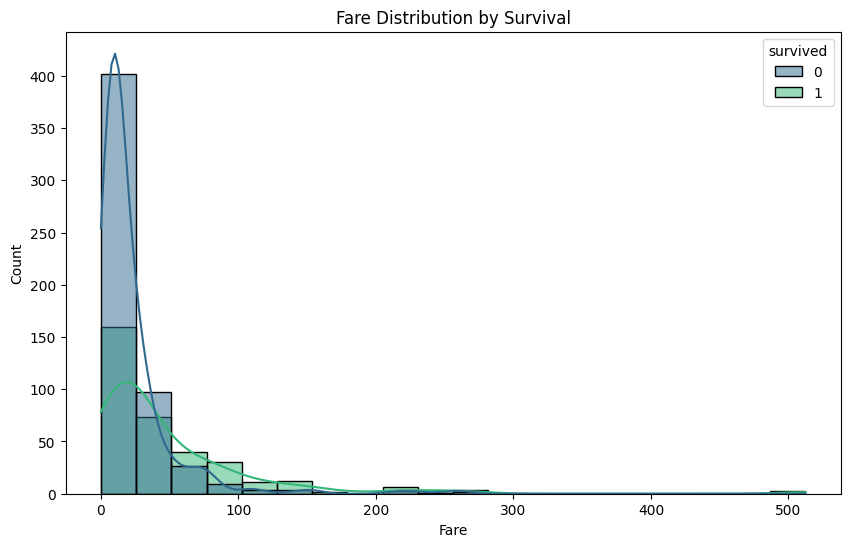

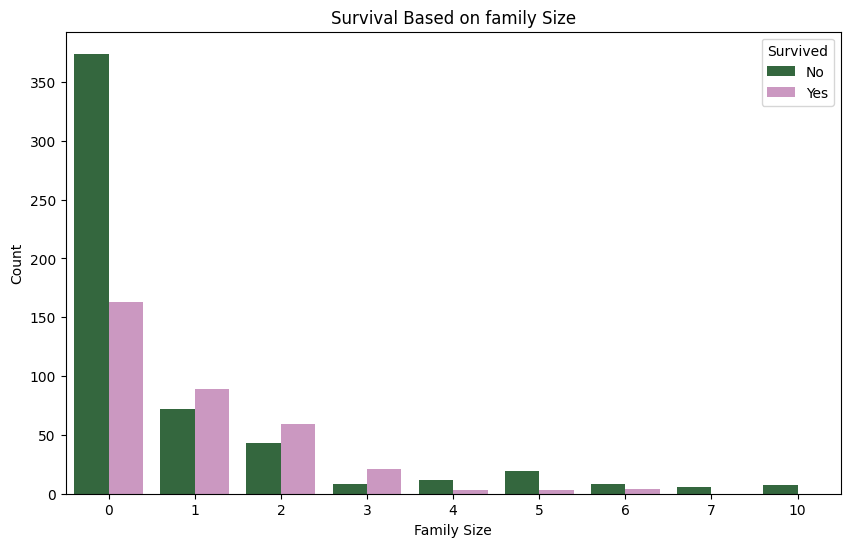

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='embarked', hue='survived', data=df,palette='Spectral')
plt.title('Survival Based on Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

#size analysis
df['family_size'] = df['sibsp'] + df['parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=df, palette='cubehelix')
plt.title('Survival Based on family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

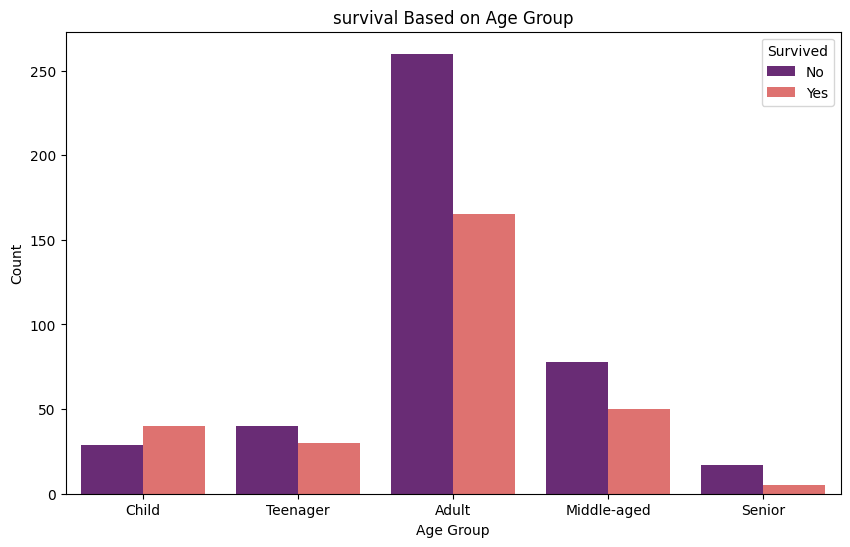

In [29]:
#age group
bins= [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=df, palette='magma')
plt.title('survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
numeric_features = df.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm